First, we import necessary packages

In [1]:
import numpy as np
import pytplot as tp
import pyspedas as sp
import astropy.units as u

from tvolib import mpl_utils as mu

Pull down PSP data during Oleksiy+20 SB event

In [2]:
trange = np.array(["2018-11-04T17:05", "2018-11-04T17:07:30"], dtype="datetime64[ns]")

sp.psp.fields(trange=trange.astype(str), level="l2", datatype="mag_rtn", time_clip=True)
t, B, _ = tp.get("psp_fld_l2_mag_RTN", dt=True, units=True)

15-Aug-23 18:46:28: Downloading remote index: https://spdf.gsfc.nasa.gov/pub/data/psp/fields/l2/mag_rtn/2018/
15-Aug-23 18:46:29: File is current: /home/tvo/.local/share/spedas/psp/fields/l2/mag_rtn/2018/psp_fld_l2_mag_rtn_2018110412_v02.cdf
15-Aug-23 18:46:49: Time clip was applied to: psp_fld_l2_mag_RTN
15-Aug-23 18:46:49: Downloading remote index: https://spdf.gsfc.nasa.gov/pub/data/psp/fields/l2/mag_rtn/2018/
15-Aug-23 18:46:50: File is current: /home/tvo/.local/share/spedas/psp/fields/l2/mag_rtn/2018/psp_fld_l2_mag_rtn_2018110412_v02.cdf
15-Aug-23 18:46:50: Time clip was applied to: psp_fld_l2_quality_flags


Clip time to interval of interest

In [3]:
ti = np.datetime64("2018-11-04T17:06:47.500")
tf = np.datetime64("2018-11-04T17:06:49.700")
idx = np.where((ti <= t) & (t <= tf))
t = t[idx].squeeze()
B = B[idx, :].squeeze()
print(t.shape, B.shape)
t = t - t[0]

(645,) (645, 3)


Now we plot and fit the data

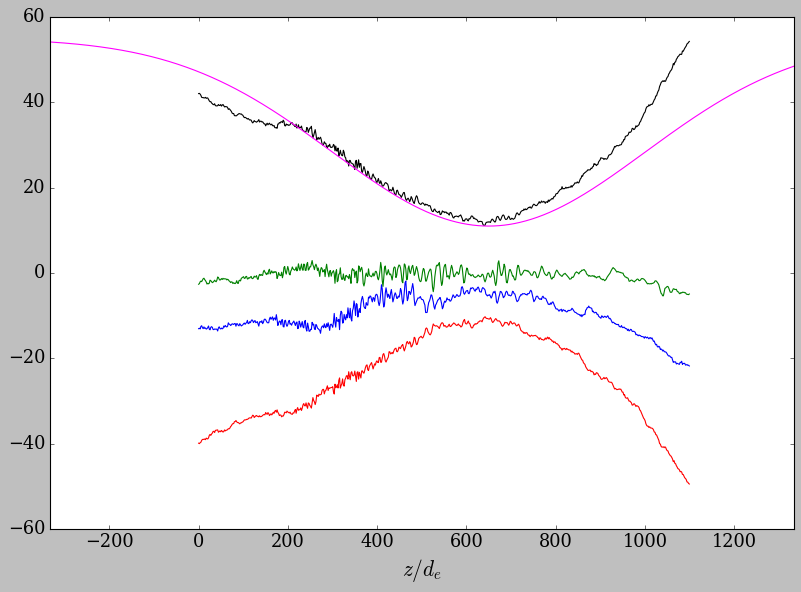

In [15]:
Vsw = 150 * u.km / u.s
z = (Vsw * t.astype("timedelta64[ns]").astype("f8") * u.ns).to(u.km)

de = 0.3 * u.km
#z_arr = np.linspace(z[0], z[-1])
z_arr = np.linspace(-100, 400, 1000) * u.km
R = 350 * de
B0 = 55 * u.nT
Bh = 0.8 * B0
z0 = 650 * de
B_model = B0 - Bh * np.exp(-0.5 * ((z_arr - z0) / R) ** 2)

fig, ax = mu.plt.subplots(1, 1, figsize=(12, 8), sharex=True)

ax.plot(z / de, B[:, 0], "-r")
ax.plot(z / de, B[:, 1], "-b")
ax.plot(z / de, B[:, 2], "-g")
ax.plot(z / de, np.linalg.norm(B, axis=1), "-k")

ax.plot(z_arr / de, B_model, c="magenta")

ax.set_xlim((z_arr / de)[0], (z_arr / de)[-1])
ax.set_xlabel("$z/d_e$")
mu.plt.show()